In [1]:
import requests
import matplotlib.pyplot as plt

In [2]:
#function to retrieve data from atlas RIPE
def getResult(id):
    url_path = "https://atlas.ripe.net/api/v2/measurements/{mId}/results".format(mId=id)
    resp = requests.get(url=url_path)
    data = resp.json()
    return data

In [3]:
# ids for all the traceroute measurements
ids = {
    '50089762': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'wifi'},
    '50089761': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'wifi'},
    '50089760': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'wifi'},
    '50089759': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'wifi'},
    '50089758': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'wifi'},
    '50089757': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'wifi'},
    '50089756': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'wifi'},
    '50089755': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'wifi'},
    '50089754': {'host': 'us-east.azure.cloudharmony.net', 'type': 'wifi'},
    '50089753': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'wifi'},
    '50089752': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'wifi'},
    '50089799': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'lan'},
    '50089798': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'lan'},
    '50089797': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'lan'},
    '50089796': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'lan'},
    '50089795': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'lan'},
    '50089794': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'lan'},
    '50089793': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'lan'},
    '50089792': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'lan'},
    '50089791': {'host': 'us-east.azure.cloudharmony.net', 'type': 'lan'},
    '50089790': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'lan'},
    '50089789': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'lan'},
    '50089732': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'cellular'},
    '50089731': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'cellular'},
    '50089730': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'cellular'},
    '50089729': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'cellular'},
    '50089728': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'cellular'},
    '50089727': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'cellular'},
    '50089726': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'cellular'},
    '50089725': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'cellular'},
    '50089724': {'host': 'us-east.azure.cloudharmony.net', 'type': 'cellular'},
    '50089723': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'cellular'},
    '50089722': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'cellular'},
    '50089702': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'satellite'},
    '50089701': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'satellite'},
    '50089700': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'satellite'},
    '50089699': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'satellite'},
    '50089698': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'satellite'},
    '50089697': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'satellite'},
    '50089696': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'satellite'},
    '50089695': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'satellite'},
    '50089694': {'host': 'us-east.azure.cloudharmony.net', 'type': 'satellite'},
    '50089693': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'satellite'},
    '50089692': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'satellite'},
}

In [4]:
data_centers = {
    'australia-east.azure.cloudharmony.net': ('Microsoft', 'OC', 'AU', 'Sydney', -33.8591, 151.2002),
    'brazil-south.azure.cloudharmony.net': ('Microsoft', 'SA', 'BR', 'Campinas', -22.9035, -47.0565),
    'eu-west-2.ec2.cloudharmony.net': ('Amazon EC2', 'EU', 'GB', 'London', 51.5164, -0.093),
    'europe-west2.gce.cloudharmony.net': ('Google', 'EU', 'GB', None, 51.5164, -0.093),
    'uk-south.azure.cloudharmony.net': ('Microsoft', 'EU', 'GB', 'London', 51.5164, -0.093),
    'ap-east-1.ec2.cloudharmony.net': ('Amazon EC2', 'AS', 'HK', 'Hong Kong', 22.25, 114.1667),
    'asia-east2.gce.cloudharmony.net': ('Google', 'AS', 'HK', 'Central', 22.2795, 114.146),
    'asia-east.azure.cloudharmony.net': ('Microsoft', 'AS', 'HK', 'Central', 22.2795, 114.146),
    'us-east-1.ec2.cloudharmony.net': ('Amazon EC2', 'NA', 'US', 'Ashburn', 39.0481, -77.4728),
    'us-east4.gce.cloudharmony.net': ('Google', 'NA', 'US', 'Washington', 38.8939, -77.0365),
    'us-east.azure.cloudharmony.net': ('Microsoft', 'NA', 'US', 'Washington', 38.7095, -78.1539),
}

In [5]:
# get all the results
allResults = {}
for id in ids:
    if ids[id]["type"] in allResults:
        allResults[ids[id]["type"]][ids[id]["host"]] = getResult(id)
    else:
        mid_Result = {}
        mid_Result[ids[id]["host"]] = getResult(id)
        allResults[ids[id]["type"]] = mid_Result

In [6]:
# turn all the results in the form 
# {"Network Techonology":
#    {"Probe_Id:"
#       [
#         {"datacenter_1": Result}
#         {"datacenter_2": Result}
#            *
#            *
#            *
#      ]
#    }
#  }
orderedRes = {}
for NetType in allResults:
    for host in allResults[NetType]:
        for probe in allResults[NetType][host]:
            probe_info_list = []
            if "result" in probe:
                for res in probe["result"]:
                    av_rtt = 0
                    rtt_count = 0
                    addr = ""
                    if "result" in res:
                        for hop in res["result"]:
                            if not "x" in hop:
                                if "rtt" in hop:
                                    av_rtt += hop["rtt"]
                                    rtt_count += 1
                                    if addr == "":
                                        addr = hop["from"]
                                    else:
                                        if addr != hop["from"]:
                                            print("DIFFERENT", addr,hop["from"], "pId", probe["prb_id"],"Type:",NetType,"host",host,"hop",res["hop"])
                        if rtt_count > 0:
                            probe_info_list.append({"hop":res["hop"],"from": addr, "rtt": av_rtt/rtt_count, "lossPer":1 - (rtt_count/5)})
                        else:
                            probe_info_list.append({"hop":res["hop"],"from": "x", "rtt": "*", "lossPer":1})
                if not NetType in orderedRes:
                    orderedRes[NetType] = dict({probe["prb_id"]:dict({host: probe_info_list})})
                else:
                    if not probe["prb_id"] in orderedRes[NetType]:
                        orderedRes[NetType].update( dict({probe["prb_id"]: dict({host: probe_info_list})}) )
                    else:
                        orderedRes[NetType][probe["prb_id"]].update(dict({host: probe_info_list}))
                

DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host us-east-1.ec2.cloudharmony.net hop 6
DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host us-east-1.ec2.cloudharmony.net hop 6
DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host us-east-1.ec2.cloudharmony.net hop 6
DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host us-east-1.ec2.cloudharmony.net hop 6
DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host us-east-1.ec2.cloudharmony.net hop 6
DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host asia-east.azure.cloudharmony.net hop 6
DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host asia-east.azure.cloudharmony.net hop 6
DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host asia-east.azure.cloudharmony.net hop 6
DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host asia-east.azure.cloudharmony.net hop 6
DIFFERENT 10.203.36.73 10.203.190.2 pId 27411 Type: cellular host

In [7]:
## function to check whether route to different datacenters located in the same place is the same
eu_dc = ['eu-west-2.ec2.cloudharmony.net','europe-west2.gce.cloudharmony.net','uk-south.azure.cloudharmony.net']
us_dc = ['us-east-1.ec2.cloudharmony.net','us-east4.gce.cloudharmony.net','us-east.azure.cloudharmony.net']
as_dc = ['ap-east-1.ec2.cloudharmony.net','asia-east2.gce.cloudharmony.net','asia-east.azure.cloudharmony.net']
dcs = [eu_dc,us_dc,as_dc]
for type in orderedRes:
    for probe in orderedRes[type]:
        for dcset in dcs:
            for dc in dcset:
                print(len(orderedRes[type][probe][dc]))
            break
        break
    break

17
4
10


In [8]:
## take an example probe located in Switzerland to show route difference
probe_id = 60
hop = {eu_dc[0]: [], eu_dc[1]: [],eu_dc[2]: []}
rtt = {eu_dc[0]: [], eu_dc[1]: [],eu_dc[2]: []}
for dc in eu_dc:
    for step in orderedRes["lan"][probe_id][dc]:
        if step["rtt"] == "*":
            rtt[dc].append(0)
        else :
            rtt[dc].append(step["rtt"])
        if step["from"] == "x":
            hop[dc].append("***")
        else:
            hop[dc].append(step["from"])


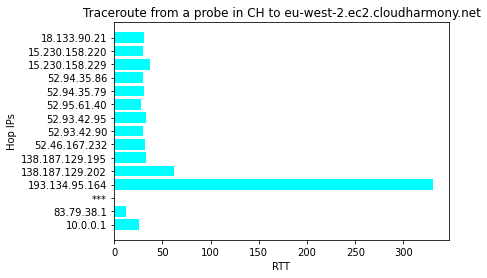

Traceroute from a probe in CH to eu-west-2.ec2.cloudharmony.net.png


In [9]:
plt.barh(hop[eu_dc[0]],rtt[eu_dc[0]],color="cyan")
plt.title("Traceroute from a probe in CH to " + eu_dc[0])
plt.xlabel("RTT")
plt.ylabel("Hop IPs")
plt.show()
print("Traceroute from a probe in CH to " + eu_dc[0] + ".png")

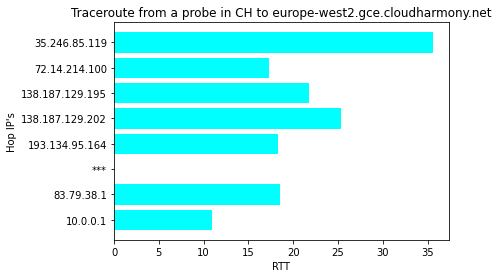

Traceroute from a probe in CH to europe-west2.gce.cloudharmony.net.png


In [10]:
plt.barh(hop[eu_dc[1]],rtt[eu_dc[1]],color="cyan")
plt.title("Traceroute from a probe in CH to " + eu_dc[1])
plt.xlabel("RTT")
plt.ylabel("Hop IP's")
plt.show()
print("Traceroute from a probe in CH to " + eu_dc[1] + ".png")

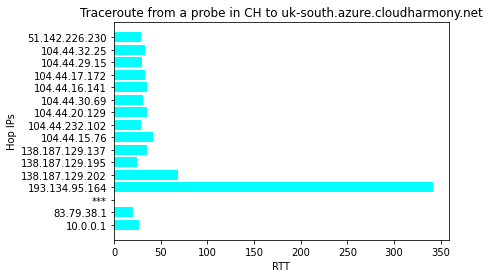

Traceroute from a probe in CH to uk-south.azure.cloudharmony.net.png


In [11]:
plt.barh(hop[eu_dc[2]],rtt[eu_dc[2]],color="cyan")
plt.title("Traceroute from a probe in CH to " + eu_dc[2])
plt.xlabel("RTT")
plt.ylabel("Hop IPs")
plt.show()
print("Traceroute from a probe in CH to " + eu_dc[2] + ".png")